1)Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
d0 = pd.read_csv("C:/Users/0004IW744/Desktop/Python/Assignments/7.Clustering/crime_data.csv")

# EDA-1

In [3]:
d0.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


No null values, all the data types are fine

In [4]:
d0.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# 1) Hierarchical Clustering

In [91]:
d0_hie = d0

In [92]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [111]:
d0_hie_norm = norm_func(d0_hie.iloc[:,1:]) #Normalizing the numerical data only

In [94]:
d0_hie_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


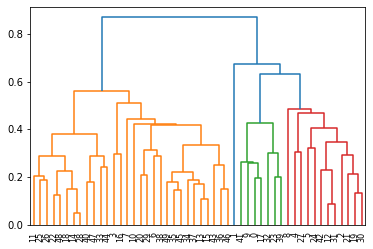

In [99]:
# creating dendrogram using the average 
dendrogram = sch.dendrogram(sch.linkage(d0_hie_norm, method='average'))

In [100]:
# create 4 clusters using the euclidean distance
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [101]:
# save clusters for chart
y_hc = hc.fit_predict(d0_hie_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [102]:
# assigning Clusters as h_clusterid
d0_hie_norm['h_clusterid'] = Clusters

In [ ]:
d0_hie_norm

In [103]:
#Grouping the same clusters and taking average and showing below
d0_hie_norm.groupby(['h_clusterid']).agg(['mean']).reset_index

<bound method DataFrame.reset_index of                Murder   Assault  UrbanPop      Rape
                 mean      mean      mean      mean
h_clusterid                                        
0            0.245181  0.237785  0.536158  0.223342
1            0.607430  0.725742  0.785311  0.644703
2            0.554217  0.746575  0.271186  0.961240
3            0.835628  0.706458  0.377724  0.371724>

# K-Means Clustering

In [108]:
from sklearn.cluster import KMeans

In [109]:
d0_KMeans = d0

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_d0_KMeans = scaler.fit_transform(d0_KMeans.iloc[:,1:])

C:\Users\0004IW744\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


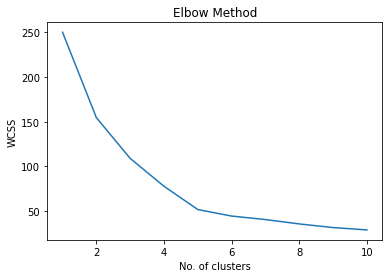

In [78]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_d0_KMeans)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [79]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=42)
clusters_new.fit(scaled_d0_KMeans)

KMeans(n_clusters=6, random_state=42)

In [80]:
clusters_new.labels_

array([4, 0, 2, 1, 2, 2, 5, 1, 2, 4, 5, 3, 2, 1, 3, 1, 1, 4, 3, 2, 5, 2,
       3, 4, 2, 1, 1, 2, 3, 5, 2, 2, 4, 3, 5, 1, 1, 5, 5, 4, 3, 4, 2, 5,
       3, 1, 5, 3, 3, 1])

In [81]:
#Assign clusters to the data set
d0_KMeans['clusterid_new'] = clusters_new.labels_

In [82]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.90349354],
       [-0.23125052, -0.30342672, -0.27242367, -0.23973789, -1.21382197],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715, -0.5241504 ],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445,  0.16552118],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ,  0.85519275],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511,  1.54486433]])

In [84]:
d0_KMeans.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.000000,263.000000,48.000000,44.500000
1,1,6.790909,145.727273,61.636364,19.009091
2,2,10.883333,256.916667,78.333333,32.250000
3,3,2.680000,70.100000,51.000000,10.910000
4,4,14.671429,251.285714,54.285714,21.685714
5,5,4.955556,125.444444,80.111111,17.788889


In [85]:
d0_KMeans

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,5
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,4


# DBSCAN

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale 

In [41]:
d_db = d0

In [42]:
# Considering only numerical data 
d_db_num = d_db.iloc[:,1:]

In [43]:
# Converting into numpy array
d_db_num_array = d_db_num.values


In [44]:
# Normalizing the numerical data 
d_db_num_normal = scale(d_db_num_array)

In [53]:
dbscan = DBSCAN(eps = 1.4, min_samples = 6)
dbscan.fit(d_db_num_normal)

DBSCAN(eps=1.4, min_samples=6)

In [54]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

Here, -1 is nothing but outliers. This will be changed based upon the eps value

In [55]:
c1 = pd.DataFrame(dbscan.labels_, columns = ['cluster'])

In [60]:
data_final = pd.concat([d_db_num,c1],axis=1)

In [61]:
data_final.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.500000,300.000,46.500000,30.300000
1,0,7.633333,165.375,66.333333,20.854167
